In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
# plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

### Load data

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

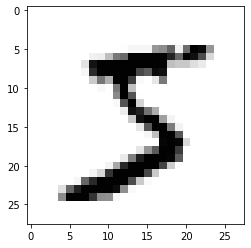

In [4]:
plt.imshow(x_train[0], cmap='Greys')

In [5]:
y_train[0]

5

In [6]:
## normalize the RGB codes by dividing it to the max RGB value to scale the data to [0,1]
x_train, x_test = x_train/255, x_test/255

### MLP model

In [7]:
## try an initial model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.2019 - acc: 0.9410
Epoch 2/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0802 - acc: 0.9758
Epoch 3/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0526 - acc: 0.9840
Epoch 4/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0377 - acc: 0.9884
Epoch 5/10
60000/60000 [==============================] - 15s 249us/step - loss: 0.0271 - acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0225 - acc: 0.9932
Epoch 7/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.0163 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0147 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0123 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 15s 245us/step - loss: 

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 37us/step


[0.08117858811497572, 0.9817]

In [10]:
## callback can be used to stop model training when achieved certain accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.98):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True
model.fit(x_train, y_train, epochs=10, callbacks=[myCallback()])

Epoch 1/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0102 - acc: 0.9968

Reached 98% accuracy so cancelling training!


In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 35us/step


[0.08451633539451323, 0.981]

In [12]:
from sklearn.metrics import classification_report

In [13]:
## confusion matrix of classifier
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

In [18]:
print(classification_report(y_test,y_pred_label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### \* Tune parameter: try add more neurons, add more layers, adjust dropout rate, .... 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [20]:
def build_model(x_train,y_train,x_test,y_test,
               n_neurons=[512,128,64],dropout=True,dropout_rate=0.5):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for i in range(len(n_neurons)):
        model.add(Dense(n_neurons[i], activation='relu'))
        if dropout == True:
            model.add(Dropout(dropout_rate))
                               
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=10, callbacks=[myCallback()])
                  
    return model.evaluate(x_test, y_test)

In [21]:
import itertools

In [38]:
df_mlp_result = pd.DataFrame(columns=["n_neurons","dropout","dropout_rate","test_acc"])

In [41]:
count = 0
for n_neurons,dropout, dropout_rate in itertools.product([[512],[512,128],[64,64],[512,128,64]],[True,False],[0.5,0.25]):
    res = build_model(x_train,y_train,x_test,y_test,n_neurons=n_neurons,dropout=dropout,dropout_rate=dropout_rate)
    print(res[1])
    df_mlp_result.loc[count] = [str(n_neurons),dropout,dropout_rate,res[1]]
    count+=1

Epoch 1/15
60000/60000 [==============================] - 16s 264us/step - loss: 0.2723 - acc: 0.9192
Epoch 2/15
60000/60000 [==============================] - 16s 260us/step - loss: 0.1384 - acc: 0.9585
Epoch 3/15
60000/60000 [==============================] - 16s 260us/step - loss: 0.1061 - acc: 0.9671
Epoch 4/15
60000/60000 [==============================] - 16s 260us/step - loss: 0.0915 - acc: 0.9709
Epoch 5/15
60000/60000 [==============================] - 18s 300us/step - loss: 0.0828 - acc: 0.9739
Epoch 6/15
60000/60000 [==============================] - 19s 315us/step - loss: 0.0724 - acc: 0.9764
Epoch 7/15
60000/60000 [==============================] - 18s 299us/step - loss: 0.0667 - acc: 0.9789
Epoch 8/15
60000/60000 [==============================] - 17s 284us/step - loss: 0.0625 - acc: 0.9799
Epoch 9/15
60000/60000 [==============================] - 17s 287us/step - loss: 0.0599 - acc: 0.9810

Reached 98% accuracy so cancelling training!
10000/10000 [=======================

60000/60000 [==============================] - 5s 81us/step - loss: 0.1187 - acc: 0.9635
Epoch 12/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.1150 - acc: 0.9648
Epoch 13/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.1136 - acc: 0.9654
Epoch 14/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.1068 - acc: 0.9672
Epoch 15/15
10000/10000 [==============================] - 1s 68us/step
0.9758
Epoch 1/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.2794 - acc: 0.9188
Epoch 2/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.1285 - acc: 0.9612
Epoch 3/15
60000/60000 [==============================] - 5s 76us/step - loss: 0.0929 - acc: 0.9715
Epoch 4/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0744 - acc: 0.9768
Epoch 5/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0601 - acc: 0.9810

Reached 98% accuracy so canc

In [43]:
df_mlp_result.sort_values('test_acc',ascending=False)

,n_neurons,dropout,dropout_rate,test_acc
0,[512],True,0.50,0.9823
13,"[512, 128, 64]",True,0.25,0.9815
12,"[512, 128, 64]",True,0.50,0.9814
1,[512],True,0.25,0.9803
2,[512],False,0.50,0.9798
4,"[512, 128]",True,0.50,0.9798
5,"[512, 128]",True,0.25,0.9788
6,"[512, 128]",False,0.50,0.9779
14,"[512, 128, 64]",False,0.50,0.9768
7,"[512, 128]",False,0.25,0.9765


### increasing hidden layers doesn't improve model performance.